Getting started with Express + TypeScript with MySQL API (เริ่มต้นสำหรับการใช้งาน Express, TypeScript ร่วมกับ MySQL)

Ref:
- https://medium.com/@gfujii-cmd/getting-started-with-express-typescript-with-mysql-api-b31c5a648aac
- https://www.bezkoder.com/node-js-typescript-mysql/
- https://xkonti.tech/blog/quasar-framework-with-typescript/

**เริ่มต้นการทำงานของโปรแกรม**

In [ ]:
mkdir express-ts && cd express-ts && code .

ทำการสร้างไฟล์ **tsconfig.json**

In [ ]:
# tsconfig.json
 {
    "compilerOptions": {
      "target": "es6",
      "module": "commonjs",
      "outDir": "dist"
    },
    "include": [
      "src/**/*.ts"
    ],
    "exclude": [
      "node_modules"
    ]
}

คำอธิบายของไฟล์ tsconfig.json ที่คุณโพสต์ไว้:

- "target": "es6": กำหนดให้คอมไพเลอร์ของ TypeScript แปลงโค้ด TypeScript เป็น JavaScript ที่รองรับ ECMAScript 2015 (ES6) ซึ่งหมายถึงโค้ดที่สร้างขึ้นจะใช้ฟีเจอร์ของ ES6 เช่น let, const, และฟังก์ชันลูกศร (arrow functions)

- "module": "commonjs": กำหนดให้ระบบโมดูลเป็น CommonJS ซึ่งเป็นระบบโมดูลที่ใช้กันทั่วไปในสภาพแวดล้อม Node.js หมายความว่าโค้ดของคุณจะใช้ require และ module.exports ในการโหลดและส่งออกโมดูล

- "outDir": "dist": กำหนดให้คอมไพเลอร์วางไฟล์ JavaScript ที่คอมไพล์แล้วไว้ในไดเรกทอรี dist ซึ่งเป็นการแยกโค้ดที่คอมไพล์แล้วออกจากโค้ดต้นฉบับ

- "include": ["src/**/*.ts"]: ระบุว่าไฟล์ TypeScript ที่จะรวมอยู่ในโปรเจกต์คือไฟล์ทั้งหมดที่มีนามสกุล .ts ภายในไดเรกทอรี src และซับไดเรกทอรีของมัน

- "exclude": ["node_modules"]: บอกให้คอมไพเลอร์ละเว้นไดเรกทอรี node_modules ซึ่งเป็นที่เก็บโมดูลของบุคคลที่สาม เพื่อไม่ให้คอมไพเลอร์ประมวลผลโมดูลเหล่านี้

ทำการติดต้ังโปรแกรม **TypeScript**

In [ ]:
npm i -g typescript

$ npm i -g typescript

changed 1 package in 3s

ทำการตรวจสอบเวอร์ชั่น (Vesrsion) ของโปรแกรม TypeScipt

In [ ]:
tsc -v

$ tsc -v

Version 5.5.4

ทำการติดต้ัง npm modul configulation

In [ ]:
npm init --yes

$ npm init --yes
Wrote to E:\6.คพ437_SE-update-7-7-67\2567-1\C5-T-Lab\express-ts\package.json:


{
  
- "name": "express-ts",
- "version": "1.0.0",
- "main": "index.js",
- "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
- "keywords": [],
- "author": "",
- "license": "ISC",
- "description": ""

}

เริ่มทำการติดต้ัง **Moduls** ท้ังหมด

In [ ]:
npm i express # express for http server
npm i mysql2 # better and faster than mysql. Database connection
npm i --save-dev nodemon # runs the app locally
npm i --save-dev concurrently # builds and serve the application
npm i body-parser # body parsing middlewate
npm i --save-dev @types/express @types/node
npm i --save-dev typescript # for compiling

ให้ทำการสร้างโฟล์เดอร์ตามโครงสร้างดังต่อไปนี้

คำอธิบายของแต่ละ npm package ที่คุณติดตั้ง:

**express:**

- คำอธิบาย: เฟรมเวิร์กสำหรับสร้างเว็บแอปพลิเคชันใน Node.js ช่วยให้ง่ายต่อการสร้างเซิร์ฟเวอร์ HTTP และจัดการกับคำขอและคำตอบ
คำสั่งติดตั้ง: npm i express
วัตถุประสงค์: ใช้สำหรับสร้างและจัดการเซิร์ฟเวอร์ HTTP ของแอปพลิเคชันของคุณ

**mysql2:**

- คำอธิบาย: Driver สำหรับเชื่อมต่อกับ MySQL ใน Node.js ซึ่งรวดเร็วและเชื่อถือได้มากกว่า package mysql เก่า
คำสั่งติดตั้ง: npm i mysql2
วัตถุประสงค์: เชื่อมต่อและทำงานกับฐานข้อมูล MySQL

**nodemon:**

- คำอธิบาย: เครื่องมือสำหรับพัฒนา ที่จะรีสตาร์ทเซิร์ฟเวอร์ Node.js ของคุณโดยอัตโนมัติเมื่อมีการเปลี่ยนแปลงไฟล์
คำสั่งติดตั้ง: npm i --save-dev nodemon
วัตถุประสงค์: ใช้ในระหว่างการพัฒนา เพื่อให้เซิร์ฟเวอร์รีโหลดโดยอัตโนมัติเมื่อมีการเปลี่ยนแปลงไฟล์

concurrently:

- คำอธิบาย: เครื่องมือสำหรับรันหลาย ๆ คำสั่ง npm พร้อมกัน (concurrently)
คำสั่งติดตั้ง: npm i --save-dev concurrently
วัตถุประสงค์: ทำให้คุณสามารถรันหลายคำสั่งพร้อมกันได้ เช่น การสร้างและให้บริการแอปพลิเคชันพร้อมกัน

**body-parser:**

- คำอธิบาย: Middleware สำหรับการแยกข้อมูลที่ส่งเข้ามาในคำขอ HTTP ก่อนที่มันจะถึง handler ของคุณ
คำสั่งติดตั้ง: npm i body-parser
วัตถุประสงค์: ช่วยในการแยกและจัดการข้อมูล JSON หรือข้อมูล URL-encoded ในร่างกายของคำขอ

@types/express:

- คำอธิบาย: TypeScript type definitions สำหรับ package express
คำสั่งติดตั้ง: npm i --save-dev @types/express
วัตถุประสงค์: ให้การสนับสนุน TypeScript สำหรับ Express เพื่อให้สามารถตรวจสอบประเภทและใช้ IntelliSense ได้

**@types/node:**

- คำอธิบาย: TypeScript type definitions สำหรับโมดูลหลักของ Node.js
คำสั่งติดตั้ง: npm i --save-dev @types/node
วัตถุประสงค์:
ให้การสนับสนุน type definitions สำหรับ Node.js เพื่อให้สามารถตรวจสอบประเภทและใช้การเติมเต็มโค้ด (autocompletion) ใน TypeScript ได้

**typescript:**
- คำอธิบาย: ตัวคอมไพเลอร์ TypeScript ที่แปลงโค้ด TypeScript เป็น JavaScript
คำสั่งติดตั้ง: npm i --save-dev typescript
วัตถุประสงค์: จำเป็นต้องใช้เพื่อคอมไพล์ไฟล์ TypeScript ให้เป็น JavaScript

In [ ]:
├── src
│   ├── config      # สำหรับการตั้งค่า
│   ├── controller  # คอนโทรลเลอร์ของแอปพลิเคชัน
│   ├── model       # โมเดลของแอปพลิเคชัน
│   └── routes      # การจัดการเส้นทาง (routing)

คำอธิบายของแต่ละโฟลเดอร์:

**config:**
- คำอธิบาย: โฟลเดอร์นี้ใช้สำหรับเก็บไฟล์การตั้งค่าต่าง ๆ เช่น การเชื่อมต่อฐานข้อมูล, ค่าคอนฟิกเซิร์ฟเวอร์, และการตั้งค่าอื่น ๆ ที่เกี่ยวข้องกับแอปพลิเคชัน
- ตัวอย่างไฟล์:
database.ts: การตั้งค่าการเชื่อมต่อกับฐานข้อมูล
server.ts: การตั้งค่าเซิร์ฟเวอร์

**controller:**
- คำอธิบาย: โฟลเดอร์นี้ใช้สำหรับเก็บไฟล์คอนโทรลเลอร์ ซึ่งเป็นส่วนที่จัดการกับลอจิกของแอปพลิเคชัน เช่น การรับคำขอ (requests), การประมวลผลข้อมูล, และการส่งคำตอบ (responses) กลับไปยังผู้ใช้
- ตัวอย่างไฟล์:
userController.ts: คอนโทรลเลอร์สำหรับการจัดการผู้ใช้
productController.ts: คอนโทรลเลอร์สำหรับการจัดการผลิตภัณฑ์

**model:**
- คำอธิบาย: โฟลเดอร์นี้ใช้สำหรับเก็บไฟล์โมเดล ซึ่งกำหนดโครงสร้างของข้อมูลและติดต่อกับฐานข้อมูล เช่น การสร้างแบบจำลองข้อมูล (data models) และการตั้งค่าสำหรับการทำงานกับฐานข้อมูล
- ตัวอย่างไฟล์:
userModel.ts: โมเดลสำหรับข้อมูลผู้ใช้
productModel.ts: โมเดลสำหรับข้อมูลผลิตภัณฑ์

**routes:**
- คำอธิบาย: โฟลเดอร์นี้ใช้สำหรับเก็บไฟล์การจัดการเส้นทาง (routing) ของแอปพลิเคชัน ซึ่งกำหนดว่าเมื่อมีการเข้าถึง URL หรือ endpoint ต่าง ๆ จะมีการทำงานอย่างไร
- ตัวอย่างไฟล์:
userRoutes.ts: การตั้งค่าเส้นทางสำหรับคำขอที่เกี่ยวข้องกับผู้ใช้
productRoutes.ts: การตั้งค่าเส้นทางสำหรับคำขอที่เกี่ยวข้องกับผลิตภัณฑ์

**วิธีการทำงานร่วมกัน:**
- config: ใช้ในการตั้งค่าคอนฟิกต่าง ๆ ที่คอนโทรลเลอร์และโมเดลจะใช้ในการทำงาน
controller: รับคำขอจากผู้ใช้, เรียกใช้โมเดลเพื่อดึงข้อมูลหรือจัดการข้อมูล, และส่งผลลัพธ์กลับไปยังผู้ใช้
- model: กำหนดโครงสร้างข้อมูลและการติดต่อกับฐานข้อมูล, ถูกใช้โดยคอนโทรลเลอร์เพื่อการจัดการข้อมูล
- routes: กำหนดเส้นทาง (routes) ที่เชื่อมโยง URL ต่าง ๆ กับคอนโทรลเลอร์ที่เกี่ยวข้อง
- การแยกโฟลเดอร์แบบนี้ช่วยให้การพัฒนาและบำรุงรักษาแอปพลิเคชันทำได้ง่ายขึ้น โดยการทำให้โค้ดเป็นระเบียบและแยกออกเป็นส่วนต่าง ๆ อย่างชัดเจน

การสร้างคำสั่ง (**scripts**) สำหรับการ run โปรแกรมในไฟล์ **package.json**

In [ ]:
# package.json
# scripts {
  "start": "npm run serve",
  "dev": "concurrently \"npm run build\" \"npm run serve:watch\"",
  # "dev": "concurrently \"npm run build:watch\" \"npm run serve:watch\"",
  "serve": "node dist/index.ts",
  "serve:watch": "nodemon dist/index.js",
  "build": "tsc",
  "build:watch": "tsc -w"
# }

การสร้าง Application ด้วย Express โดย TypeScipt โดยทำการสร้างไฟล์ **index.ts ภายในโฟล์เดอร์ src**

In [ ]:
# src/index.ts
import * as express from 'express';
import * as bodyParser from 'body-parser';

const app = express();

app.use(bodyParser.json());
app.use(bodyParser.urlencoded({extended: false}));

const port = process.env.PORT || 3000;

app.get('/', (req, res) => {
  res.send('Hello World!')
})

app.listen(port, () => {
    console.log(`Listening on http://localhost:${port}`)
})

**คำอธิบายโค้ด**
- import * as express from 'express';: นำเข้าโมดูล express ซึ่งเป็นเฟรมเวิร์กสำหรับสร้างแอปพลิเคชันเว็บใน Node.js

- import * as bodyParser from 'body-parser';: นำเข้าโมดูล body-parser เพื่อช่วยในการแยกข้อมูลจากคำขอ (request) ที่เข้ามา

- const app = express();: สร้างอินสแตนซ์ของ Express ซึ่งจะทำหน้าที่เป็นเซิร์ฟเวอร์ของแอปพลิเคชัน
- app.use(bodyParser.json());: ใช้ body-parser เพื่อแยกข้อมูล JSON ที่มาจากคำขอ และเก็บข้อมูลเหล่านั้นไว้ใน req.body
- app.use(bodyParser.urlencoded({extended: false}));: ใช้ body-parser เพื่อแยกข้อมูลที่เป็น URL-encoded (เช่น ข้อมูลจากฟอร์ม HTML) และเก็บไว้ใน req.body
- const port = process.env.PORT || 3000;: กำหนดพอร์ตที่เซิร์ฟเวอร์จะฟังคำขอ ถ้าตัวแปรสภาพแวดล้อม PORT ถูกตั้งค่า มันจะใช้ค่าของตัวแปรนั้น มิฉะนั้นจะใช้พอร์ต 3000
- app.get('/', (req, res) => { ... }): กำหนดเส้นทาง (route) สำหรับคำขอ GET ที่ /. เมื่อมีคำขอ GET มาที่ URL นี้, เซิร์ฟเวอร์จะส่งข้อความ "Hello World!" กลับไป
- app.listen(port, () => { ... }): เริ่มเซิร์ฟเวอร์และให้ฟังคำขอบนพอร์ตที่กำหนด และพิมพ์ข้อความในคอนโซลเมื่อเซิร์ฟเวอร์เริ่มทำงาน

การออกแบบโมเดล (**Models**)
- ให้ทำการเขียนโปรแกรมภายใต้โฟล์เดอร์ Models

In [ ]:
models/product.ts

export interface Product {
    id: number;
    name: string;
    price: number;
}

สร้างไฟล์ **product.controller.ts **ในโฟล์เดอร์ **controllers**

In [ ]:
# controllers/product.controller.ts
import { Router, Request, Response } from 'express';
import { Product } from '../model/product';
const productList: Product[] = [
    {
        id: 1,
        name: 'Bombril',
        price: 8
    },
    {
        id: 1,
        name: 'Sausage',
        price: 3
    }
]
const getAll = (req: Request, res: Response) => {
    res.status(200).send(productList);
}
export default { getAll }

สร้างไฟล์ **product.route.ts** ในโฟล์เดอร์ **routes**

In [ ]:
# routes/product.route.ts
import { Router } from 'express';
import productController from '../controller/product.controller';
const productRouter = Router();
// specifies the endpoint and the method to call
productRouter.get('/', productController.getAll);
// export the router
export default productRouter;

ทำการเพิ่มไฟล์ **index.ts** ไปที่ **routes**

In [ ]:
# routes/index.ts
import { Router } from 'express';
import productRouter from './product.route';
const routes = Router();
// define the base path and the router that's going to be called
routes.use('/products', productRouter);
// export the route
export default routes;

ทำการปรับปรุงไฟล์ index.ts ใน src

In [ ]:
# src/index.ts
import routes from './routes';
//...
// applying the routes to the basepath '/api'
app.use('/api', routes);

**การทดสอบระบบ**

In [ ]:
localhost:3000/api/products

--------------------------------------------
การเชื่อมต่อกับะบบฐานข้อมูล (Database Connection)
--------------------------------------------

---------------------------------------------

ให้ทำการสร้าง **docker-compose.yml** ใน root ของโปรแกรม

In [ ]:
# docker-compose.yml
version: "3.9"
services:
  db:
    platform: linux/amd64 # configuration for M1 macs
    image: mysql:8.0
    container_name: mysql_db
    command: [ "--default-authentication-plugin=mysql_native_password" ]
    ports:
      - "3306:3306"
    environment:
      MYSQL_ROOT_PASSWORD: admin
      MYSQL_DATABASE: product_db
    volumes:
      - mysql_data:/var/lib/mysql

  phpmyadmin:
    image: phpmyadmin/phpmyadmin
    container_name: phpmyadmin
    ports:
      - "8080:80"
    environment:
      PMA_HOST: db
      PMA_USER: root
      PMA_PASSWORD: admin
    depends_on:
      - db

volumes:
  mysql_data:

# http://localhost:8080/ for phpMyAdmin
# https://medium.com/ucsc-isaca-student-group/how-to-run-mysql-with-docker-and-connect-with-phpmyadmin-ac23f2d50096#:~:text=Once%20the%20container%20is%20up,I%20have%20used%20%E2%80%9Cpass%E2%80%9D.

# create table product (id integer unique not null, name varchar(40), price float);
# insert into product values (1, 'Bombril', 7.9);
# insert into product values (2, 'Pasta', 3.0);

การใช้งาน docker-compose.yml

In [ ]:
docker-compose up -d

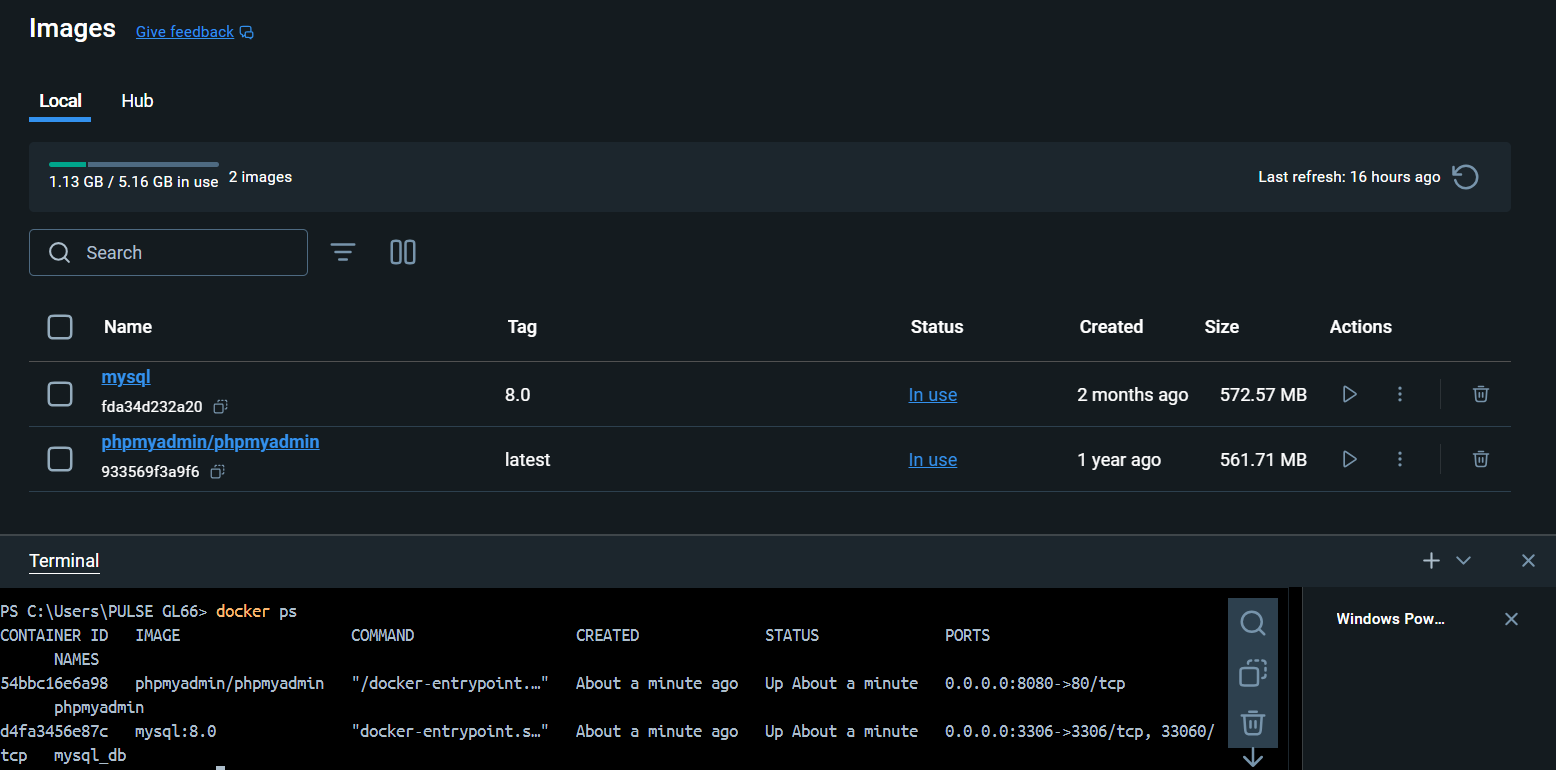

In [ ]:
docker ps

In [ ]:
PS C:\Users\PULSE GL66> docker ps
CONTAINER ID   IMAGE                   COMMAND                  CREATED              STATUS              PORTS                               NAMES
54bbc16e6a98   phpmyadmin/phpmyadmin   "/docker-entrypoint.…"   About a minute ago   Up About a minute   0.0.0.0:8080->80/tcp                phpmyadmin
d4fa3456e87c   mysql:8.0               "docker-entrypoint.s…"   About a minute ago   Up About a minute   0.0.0.0:3306->3306/tcp, 33060/tcp   mysql_db

In [ ]:
http://localhost:8080/

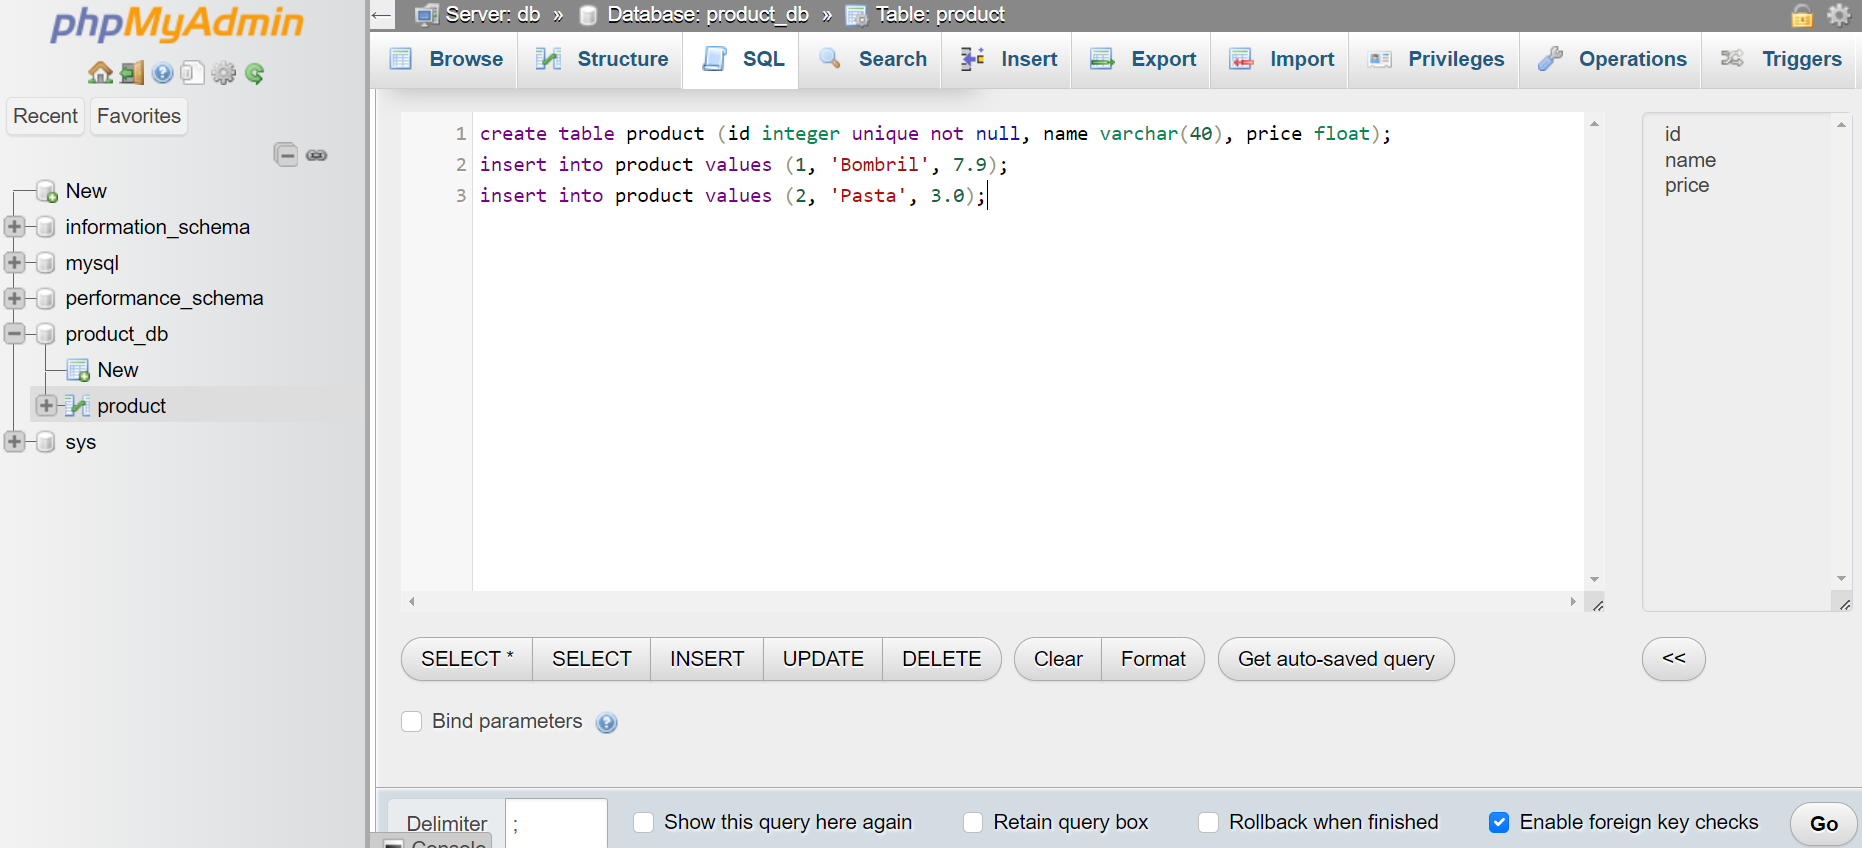

ทำการสร้างตาราง

In [ ]:
create table product (id integer unique not null, name varchar(40), price float);
insert into product values (1, 'Bombril', 7.9);
insert into product values (2, 'Pasta', 3.0);

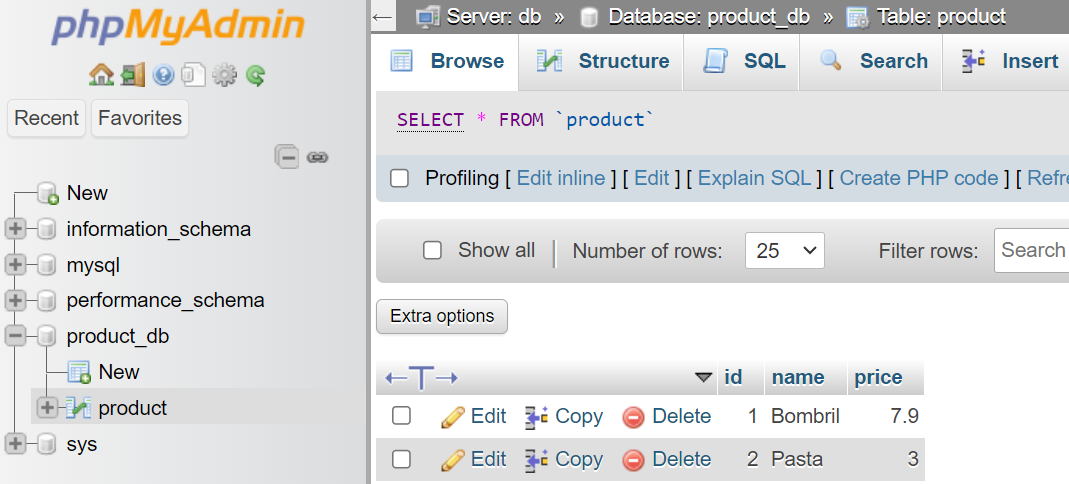

ทำการ  ***แก้ไข***  ไฟล์ **product.controller.ts** ในส่วนของ **getAll**

In [ ]:
# controllers/product.controller.ts

import { Request, Response } from "express";
import { Product } from "../model/product";
import { promisePool } from "../config/db";
import { QueryError, PoolConnection } from "mysql2";
import { RowDataPacket } from "mysql2"; // Import type for rows returned from queries
import product from "../db/product";

const getAll = (req: Request, res: Response) => {
  product
    .selectAll() //--db/product.ts
    .then((products) => {
      // .then for async call
      res.status(200).send({
        message: "OK",
        result: products,
      });
    })
    .catch((err) => {
      res.status(500).send({
        message: "DATABASE ERROR",
        error: err.code,
      });
    });
};
export default { getAll };

ให้ทำการสร้างไฟล์เพื่อเข้าถึงฐานข้อมูล (Isolating queries) ให้ทำการสร้าง **product.ts** ในโฟล์เดอร์ **db**  

In [ ]:
# db/product.ts

import { QueryError, PoolConnection } from "mysql2";
import { connection } from "../config/db";
import { Product } from "../model/product";
import { RowDataPacket } from "mysql2"; // Import type for rows returned from queries
import { promisePool } from "../config/db";
import { Request, Response } from "express"; // Import Request and Response from express

const selectAll = async () => {
  try {
    const [rows]: [RowDataPacket[], any] = await promisePool.query(
      "SELECT * FROM product"
    );
    return rows;
  } catch (err) {
    console.error("Database query error:", err);
  }
};

export default { selectAll };


ให้ทำการเพิ่มไฟล์ **db.ts** ในโฟล์เดอร์ **config**

In [ ]:
# config/db.ts

import { createPool } from "mysql2";

// Create a pool of connections
export const connection = createPool({
  host: "127.0.0.1",
  port: 3306,
  user: "root",
  password: "admin",
  database: "product_db",
  // `connectionLimit` is optional but a good idea to define
  connectionLimit: 10,
});

// Wrap the pool in a promise-based API if needed
export const promisePool = connection.promise();


-----------------------------------------------------------------------
ให้ใข้ Dot Env
-----------------------------------------------------------------------

In [ ]:
npm i dotenv

ให้ทำการสร้างไฟล์ .env ในส่วนของ root

In [ ]:
# .env
DATABASE_HOST=127.0.0.1
DATABASE_USER=root
DATABASE_PASSWORD=admin
DATABASE_PORT=3306
DATABASE_NAME=product_db

ให้ทำการแก้ไขไฟล์ db.ts ในโฟล์เดอร์ config

In [ ]:
import { createPool } from "mysql2";
import * as dotenv from "dotenv";
dotenv.config();
// Create a pool of connections
export const connection = createPool({
  // host: "127.0.0.1",
  // port: 3306,
  // user: "root",
  // password: "admin",
  // database: "product_db",
  host: process.env.DATABASE_HOST,
  port: parseInt(process.env.DATABASE_PORT, 10),
  user: process.env.DATABASE_USER,
  password: process.env.DATABASE_PASSWORD,
  database: process.env.DATABASE_NAME,
  // `connectionLimit` is optional but a good idea to define
  connectionLimit: 10,
});

// Wrap the pool in a promise-based API if needed
export const promisePool = connection.promise();


เติมเต็ม----555555-------

In [ ]:
# product.ts
import { RowDataPacket, ResultSetHeader } from "mysql2";
import { promisePool } from "../config/db";

// Function to select all products
const selectAll = async (): Promise<RowDataPacket[]> => {
  try {
    const [rows]: [RowDataPacket[], any] = await promisePool.query(
      "SELECT * FROM product"
    );
    return rows;
  } catch (err) {
    console.error("Database query error:", err);
    throw err; // Ensure the error is thrown so that the caller can handle it
  }
};

// Function to delete a product by ID
const deleteProductById = async (id: number): Promise<void> => {
  try {
    console.log(`Attempting to delete product with ID: ${id}`);
    const [result] = await promisePool.query<ResultSetHeader>(
      "DELETE FROM product WHERE id = ?",
      [id]
    );
    console.log("Delete result:", result);
    // Optionally, you can check if the affectedRows property is 0 to handle the case where no rows were deleted
    if ((result as ResultSetHeader).affectedRows === 0) {
      console.warn(`No product found with ID: ${id}`);
    }
  } catch (err) {
    console.error("Database deletion error:", err);
    throw err; // It's good practice to throw the error after logging it
  }
};

// Function to insert a new product
const insertProduct = async (
  id: number,
  name: string,
  price: number
): Promise<void> => {
  try {
    const [result] = await promisePool.query<ResultSetHeader>(
      "INSERT INTO product (id, name, price) VALUES (?, ?, ?)",
      [id, name, price]
    );
    console.log("Insert result:", result);
    if ((result as ResultSetHeader).affectedRows === 0) {
      console.warn("Insert operation did not affect any rows");
    }
  } catch (err) {
    console.error("Database insertion error:", err);
    throw err;
  }
};

// Function to update a product by ID
const updateProduct = async (
  id: number,
  name: string,
  price: number
): Promise<void> => {
  try {
    const [result] = await promisePool.query<ResultSetHeader>(
      "UPDATE product SET name = ?, price = ? WHERE id = ?",
      [name, price, id]
    );
    console.log("Update result:", result);
    if ((result as ResultSetHeader).affectedRows === 0) {
      console.warn(`No product found with ID: ${id}`);
    }
  } catch (err) {
    console.error("Database update error:", err);
    throw err;
  }
};

export default { selectAll, deleteProductById, insertProduct, updateProduct };

In [ ]:
# product.controller.ts
import { Request, Response } from "express";
import product from "../db/product";

// Handler to get all products
const getAll = async (req: Request, res: Response) => {
  try {
    const products = await product.selectAll();
    res.status(200).send({
      message: "OK",
      result: products,
    });
  } catch (err) {
    console.error("Error fetching products:", err); // Log the full error
    res.status(500).send({
      message: "DATABASE ERROR",
      error: (err as Error).message || "Unknown error", // Ensure error.message is used safely
    });
  }
};

// Handler to delete a product by ID
const deleteById = async (req: Request, res: Response) => {
  const id = parseInt(req.params.id, 10);

  if (isNaN(id)) {
    return res.status(400).send({
      message: "Invalid ID format",
    });
  }

  try {
    await product.deleteProductById(id);
    res.status(200).send({
      message: "OK",
      result: `Product with ID ${id} deleted successfully`,
    });
  } catch (err) {
    console.error(`Error deleting product with ID ${id}:`, err); // Log the full error
    res.status(500).send({
      message: "DATABASE ERROR",
      error: (err as Error).message || "Unknown error", // Ensure error.message is used safely
    });
  }
};

// Handler to insert a new product
const insertProduct = async (req: Request, res: Response) => {
  const { id, name, price } = req.body;

  // Basic validation
  if (
    typeof id !== "number" ||
    typeof name !== "string" ||
    typeof price !== "number"
  ) {
    return res.status(400).send({
      message: "Invalid input data",
    });
  }

  try {
    await product.insertProduct(id, name, price);
    res.status(201).send({
      message: "Product created successfully",
    });
  } catch (err) {
    console.error("Error inserting product:", err); // Log the full error
    res.status(500).send({
      message: "DATABASE ERROR",
      error: (err as Error).message || "Unknown error", // Ensure error.message is used safely
    });
  }
};

// Handler to update an existing product by ID
const updateProduct = async (req: Request, res: Response) => {
  const id = parseInt(req.params.id, 10);
  const { name, price } = req.body;

  // Basic validation
  if (isNaN(id) || typeof name !== "string" || typeof price !== "number") {
    return res.status(400).send({
      message: "Invalid input data",
    });
  }

  try {
    await product.updateProduct(id, name, price);
    res.status(200).send({
      message: `Product with ID ${id} updated successfully`,
    });
  } catch (err) {
    console.error(`Error updating product with ID ${id}:`, err); // Log the full error
    res.status(500).send({
      message: "DATABASE ERROR",
      error: (err as Error).message || "Unknown error", // Ensure error.message is used safely
    });
  }
};

export default { getAll, deleteById, insertProduct, updateProduct };

In [ ]:
# product.routes.ts
import { Router } from "express";
import productController from "../controller/product.controller"; // Assuming the controller file is located in the parent directory of the current file

const productRouter = Router();

// Endpoint to get all products
productRouter.get("/", productController.getAll);

// Endpoint to delete a product by ID
productRouter.delete("/:id", productController.deleteById);

// Endpoint to insert a new product
productRouter.post("/", productController.insertProduct);

// Endpoint to update an existing product by ID
productRouter.put("/:id", productController.updateProduct);

export default productRouter;
